# Somatotopy code tutorial 6- RSA and Procrustes analysis

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import touchsim as ts
from touchsim.plotting import plot, figsave
import numpy as np
import pickle as pk
import holoviews as hv
hv.notebook_extension()
%output holomap='scrubber' # animate holomaps
import somatotopic_maps as sp
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Load pre-made input set and hand population

In [2]:
# load the sample hand pop (tutorial 1)
with open('hand_pop_obj.pkl', 'rb') as f:
    hand_pop = pk.load(f)

:Overlay
   .NdOverlay.I :NdOverlay   [Element]
      :Points   [x,y]
   .Path.I      :Path   [x,y]
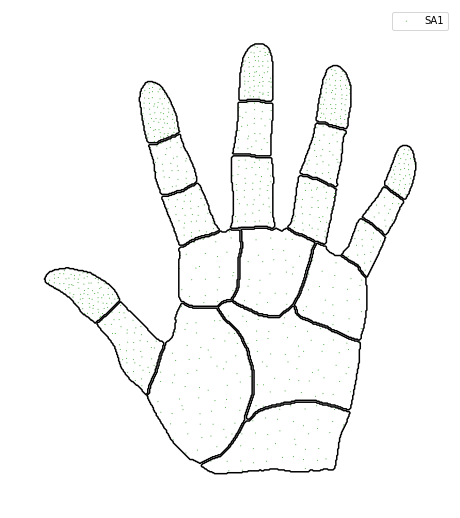

In [3]:
# plot the hand surface and afferents
%output size=250
plot(hand_pop.ts_hand,tags=True,coord=10) * plot()

In [4]:
# load the sample input set (tutorial 2)
with open('hand_inputs_tutorial.pkl', 'rb') as file:
    inputs = pk.load(file)

input_responses = inputs.input_data

## Run the SOM algorithm

In [5]:
# Use the loaded inputs to train the map

# train using 20000 inputs
input_num = 20000
update_savepath = ''

# run SOM algorithm
som_map = sp.K_SOM(sheet_size_a=30, sheet_size_b=30, seed=0)

som_map.fit(input_responses, input_num=input_num, input_order='rand', update_plot_data=[hand_pop.hand_main, update_savepath])

weights = som_map.w.T
weights_change = som_map.w_change
l_r = som_map.l_r
n_s = som_map.n_R2

Iterations: 100%|██████████████████████████████████████████████████████████████| 20000/20000 [00:07<00:00, 2743.67it/s]


## Generate data for RSA matrices
Simulation of fMRI digit tapping, as explained in tutorial 5 is required to get a representation of each stimuli in the map. Once the map repsonse to all stimuli have been created we can generate the RSA matrix.

#### Select the regions that will be stimulate- here we choose the fingertips

In [6]:
hand_regions = ['D1d','D2d','D3d','D4d','D5d']

#### Calculate the afferent response to stimuli placed on the fingertip.multi_region_responses is a dictionary with the stimulation information for each digit. Each trial/ stimuli information is stored, including the stimuli info eg.location, and the response profile.

In [7]:
multi_region_responses = sp.fmri_simulation_multi_regions(hand_pop=hand_pop, trials=4, regions=hand_regions, jitter=2, size=20)

### Calculate the map responses to these stimuli. 

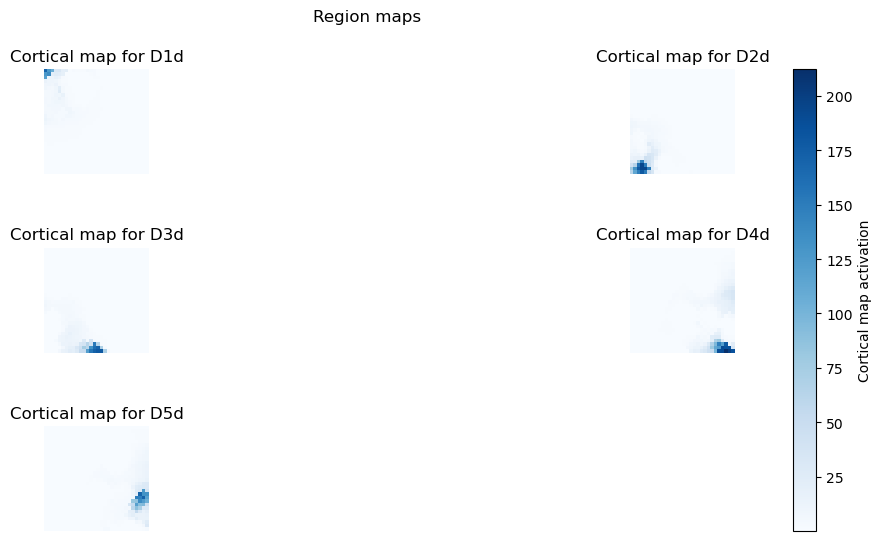

In [8]:
# all region maps contains the map generated from each stimuli
# all average maps contains the average maps over all the stimuli responses.
all_region_maps, all_average_maps = sp.fmri_map_response_all_regions(weights, stimuli_all=multi_region_responses, region_names=hand_regions, plot=True)

## RSA matrices
RSA matrices show the dissimilarity in the cortical map between stimuli activations. A value of 0 indicates completely similar, and higher values indicate increasing dissimilarity between representations. Currently uses Euclidean distances.

#### Calculate RSA

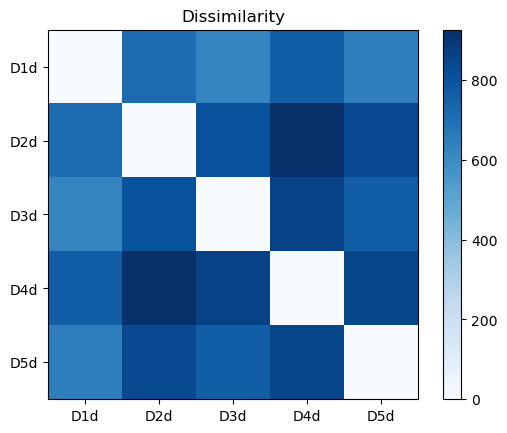

In [9]:
diss = sp.fmri_RSA_analysis_all(all_average_maps, plot=True)

## MDS representations

In [10]:
mds_coords = sp.fmri_RSA_mds(diss, hand_regions)

Stress: 0.18811213322927167


### View the MDS

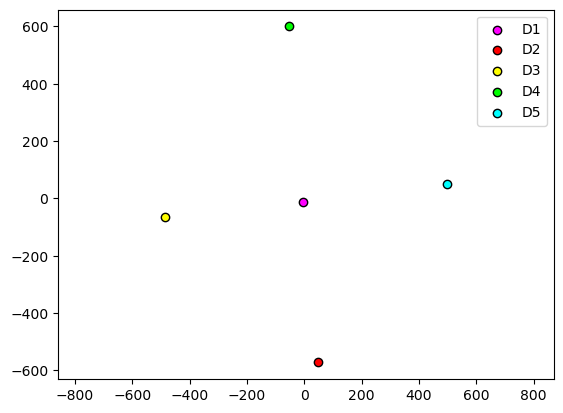

In [11]:
sp.plot_mds_single(mds_coords, hand_pop.hand_main)

## Average RSA & Procrustes alignment

To calculate the procrustes alignment multiple maps should be compared. Here we will load in 10 pre-trained maps to compare the responses.

In [12]:
# Run the maps twice times and save- comment out this cell once saving files are done, and load in from below

num_maps = 5 # set  to number of maps in dataset
all_maps = np.zeros((912,900,num_maps))
input_num = 20000

for i,idx in enumerate(np.arange(num_maps)):
    # run SOM algorithm
    som_map = sp.K_SOM(sheet_size_a=30, sheet_size_b=30, seed=idx)
    som_map.fit(input_responses, input_num=input_num, input_order='rand', update_plots=False)
    all_maps[:,:,i] = som_map.w.T
 
with open('map_data.pkl', 'wb') as f:
    pk.dump(all_maps, f)

Iterations: 100%|██████████████████████████████████████████████████████████████| 20000/20000 [00:06<00:00, 2971.23it/s]


In [13]:
#### Load in the maps
with open('map_data.pkl', 'rb') as f:
    all_map_data = pk.load(f)

Stress: 0.18811213322927164
Stress: 0.21352109777563255
Stress: 0.21849302404977577
Stress: 0.22875594304541838
Stress: 0.2187671738738302


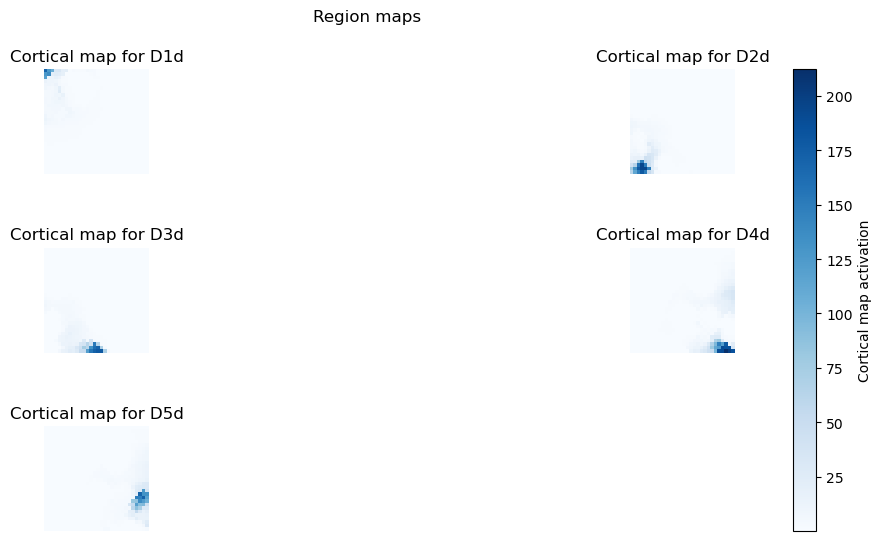

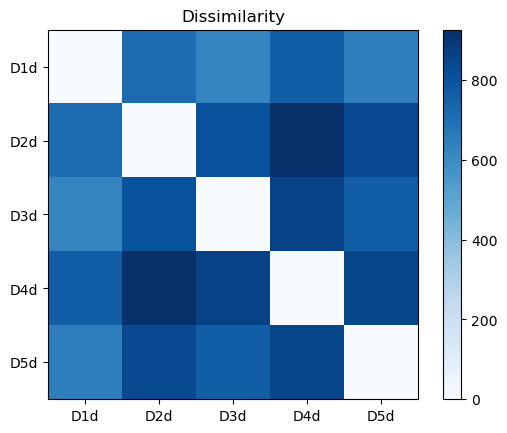

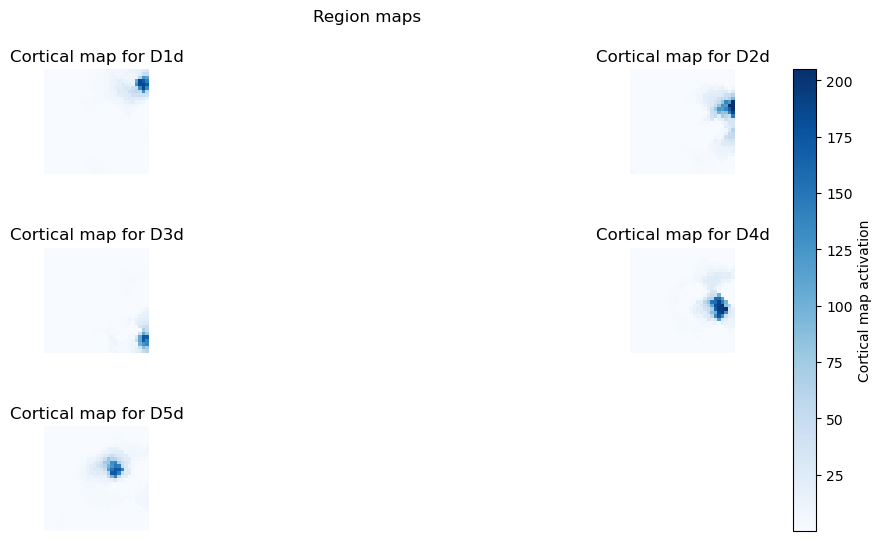

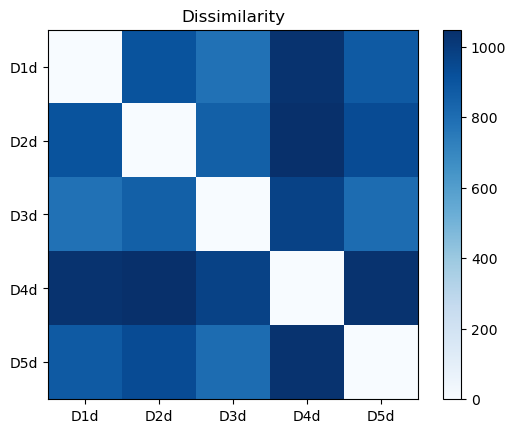

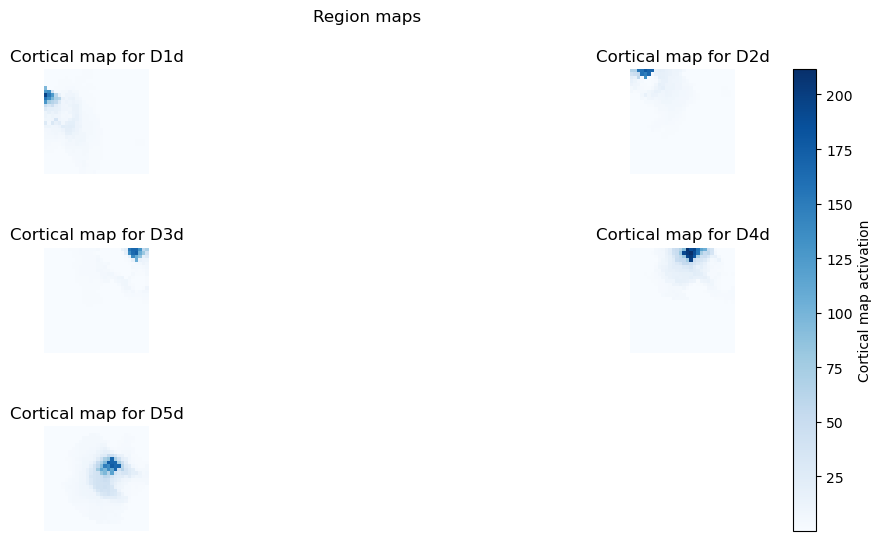

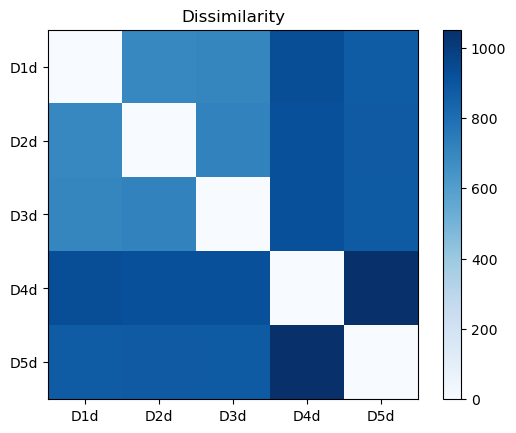

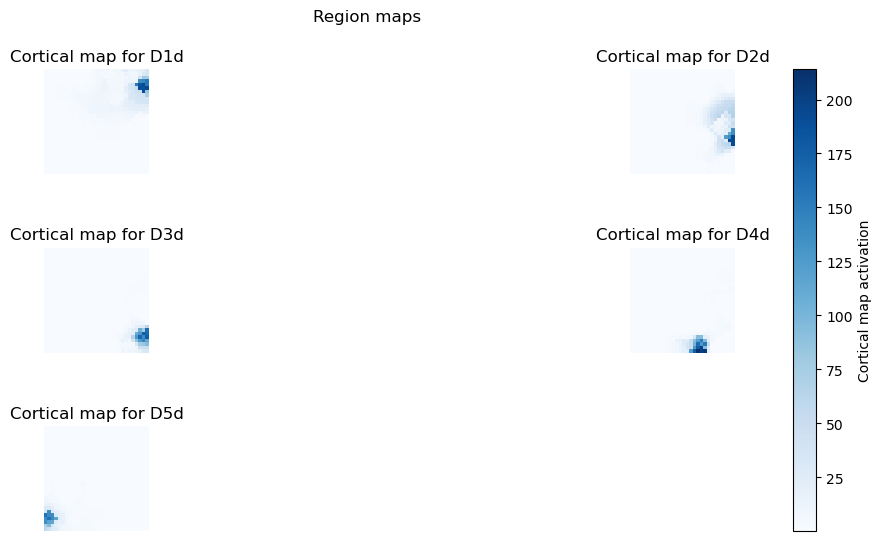

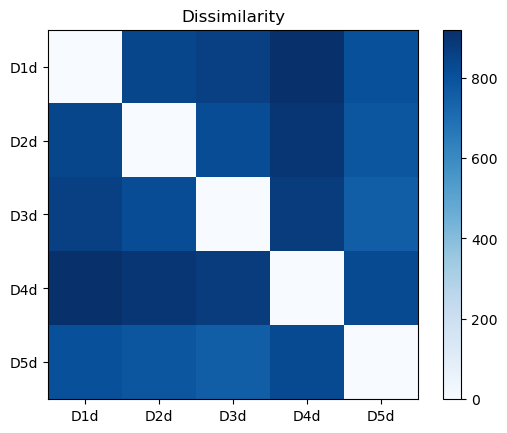

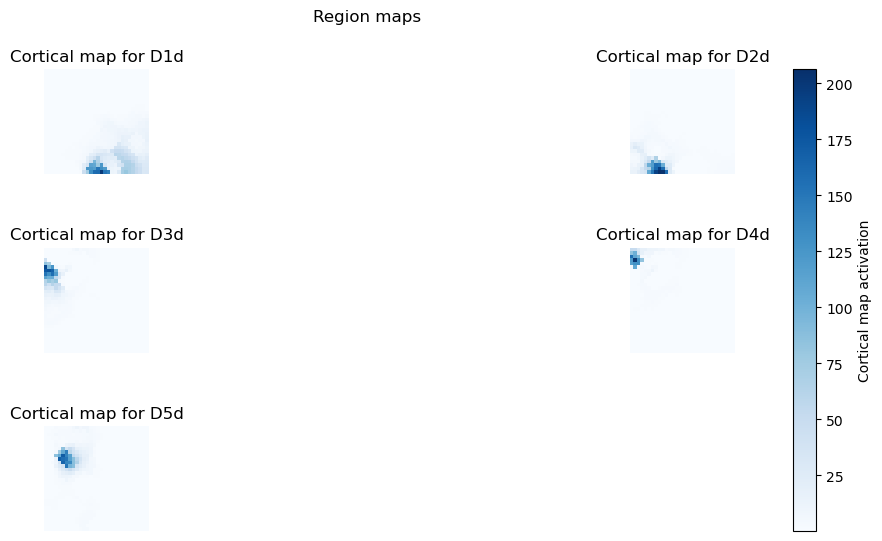

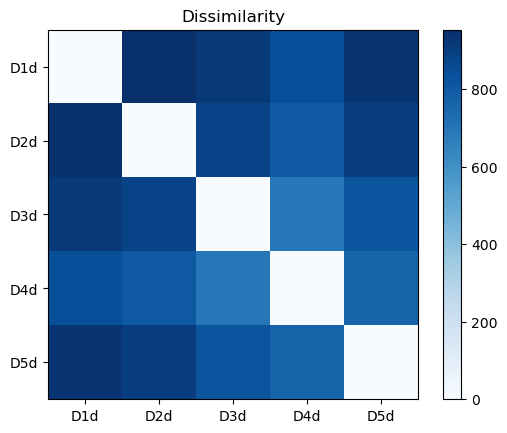

In [14]:
# Calculate the RSA for each map
dissimilarity_all = np.zeros((5,5,num_maps))

mds_all = np.zeros((5,2,num_maps))

for i in range(num_maps):
    
    weights = all_map_data[:,:,i]
    
    all_region_maps, all_average_maps = sp.fmri_map_response_all_regions(weights, stimuli_all=multi_region_responses,
                                                                         region_names=hand_regions, plot=True)
    diss = sp.fmri_RSA_analysis_all(all_average_maps, distance_metric='euclidean', plot=True)
    
    # save the dissimilarity matrix
    dissimilarity_all[:,:,i] = diss
    
    mds_coords = sp.fmri_RSA_mds(diss, hand_regions)
    
    # save the mds coords
    mds_all[:,:,i] = mds_coords


### Procrustes shape alignment
Generalised procrustes alignment is used to combine all the MDS of the RSA matrices and reconstruct the overall alignment. The error of the alignment in each direction can be seen.

In [15]:
map_idx_1 = 2
map_idx_2 = 4
fit_coords = sp.basic_fit(mds_all[:,:,map_idx_1], mds_all[:,:,map_idx_2])

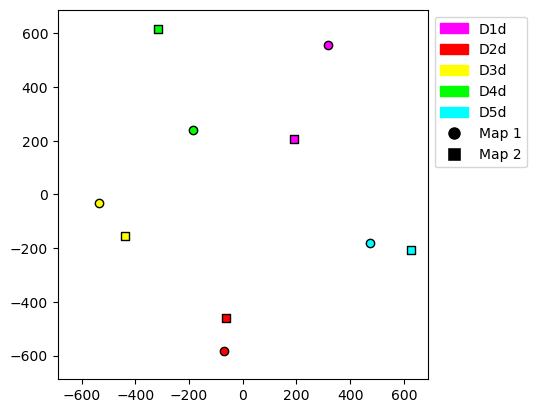

In [16]:
sp.plot_procrustes_fit(mds_coords, fit_coords, hand_pop.hand_main)